In [11]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2
import copy
import random
from vst_function import *
from stattools.resampling import PermutationTest

In [12]:
### GRCh37

In [13]:
#pd.set_option('display.max_rows', 400)
data = pd.read_csv("../data/cnvator_data_sudmant_overlapped.csv")


anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=1)

distribution = data[data['LENGHT'] < 200000]

In [14]:
## Filter by chromosomes
data_x = distribution[distribution.Chr == 'X']
data_no_sex_chr = distribution[distribution.Chr != 'Y']
data_no_sex_chr = data_no_sex_chr[data_no_sex_chr.Chr != 'X']

data_x

,Sample_ID,Chr,Start_original,End_original,Start,End,SIZE,SCORE,RD,LENGHT,P-VALUE,GAUSSIAN
797,LP6005441-DNA_A01,X,5055301,5057500,5053361,5057758,1.0,deletion,0.017231,2200.0,7.244210e-11,2.173010e-40
798,LP6005441-DNA_A01,X,5055301,5057500,5053110,5057954,1.0,deletion,0.017231,2200.0,7.244210e-11,2.173010e-40
799,LP6005441-DNA_A01,X,6503601,6505200,6450477,6630171,3.0,duplication,2.038060,1600.0,7.846390e-05,7.396590e-09
800,LP6005441-DNA_A01,X,11725701,11729400,11724830,11734178,3.0,duplication,1.793960,3700.0,1.464500e-09,9.899600e-12
801,LP6005441-DNA_A01,X,11955101,11959400,11951461,11959719,3.0,duplication,2.023490,4300.0,0.000000e+00,1.607600e-11
...,...,...,...,...,...,...,...,...,...,...,...,...
256113,SS6004480,X,153459601,153466400,153408881,153523661,3.0,duplication,1.882080,6800.0,3.234320e-09,7.076210e+01
256114,SS6004480,X,153474401,153496200,153408881,153523661,3.0,duplication,1.734000,21800.0,0.000000e+00,2.123580e+09
256115,SS6004480,X,153498901,153518500,153408881,153523661,3.0,duplication,1.886020,19600.0,0.000000e+00,2.117350e+07
256116,SS6004480,X,154798801,154804000,154789310,154826421,1.0,deletion,0.315173,5200.0,3.064860e-11,2.713240e+05


In [15]:
### CHM13

In [16]:
## Read and merge files 
anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1')

ids_hg19 = pd.DataFrame()
ids_hg19['SAMPLE'] = anotation['3-Illumina_ID']
ids_hg19['REGION'] = anotation['10-Region']
ids_hg19['COUNTRY'] = anotation['11-Country']

In [17]:
chm13 = pd.read_csv('/Users/luciabazan/Downloads/chm13_gene_regions.csv', index_col=0)
chm13['LENGHT'] = chm13['END'] - chm13['START']
chm13 = chm13.drop(columns=['START_GENE', 'END_GENE'])
chm13 = chm13.drop_duplicates()
temp_cols=chm13.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
chm13=chm13[new_cols]
#chm13.to_csv('../data/t2tchm13genes.bed', sep='\t', header=False, index=False )#['TYPE'].value_counts()
chm13.sort_values(by='LENGHT')

,CHR,START,END,SCORE,TYPE,LENGHT,SAMPLE
827304,chrX,150555767,150563768,1,DELETION,8001,LP6005443-DNA_H05
387194,chrX,150555767,150563768,1,DELETION,8001,LP6005442-DNA_G02
937451,chrX,150555767,150563768,1,DELETION,8001,LP6005443-DNA_F07
246257,chrX,150555767,150563768,1,DELETION,8001,LP6005441-DNA_A08
155587,chrX,150555767,150563768,1,DELETION,8001,LP6005442-DNA_D02
...,...,...,...,...,...,...,...
536568,chr1,2086549,2277495,1,DELETION,190946,LP6005441-DNA_D11
676962,chr1,2086549,2277495,1,DELETION,190946,LP6005443-DNA_F04
72935,chr1,2086549,2277495,1,DELETION,190946,LP6005443-DNA_E06
550986,chr1,2086549,2277495,1,DELETION,190946,LP6005441-DNA_G12


In [20]:
## Filter by chromosomes
data_x_chm13 = chm13[chm13.CHR == 'chrX']
data_no_sex_chr_chm13 = chm13[chm13.CHR != 'chrY']
data_no_sex_chr_chm13 = data_no_sex_chr_chm13[data_no_sex_chr_chm13.CHR != 'chrX']

data_no_sex_chr_chm13

,CHR,START,END,SCORE,TYPE,LENGHT,SAMPLE
165,chr22,18805936,18816025,1,DELETION,10089,LP6005441-DNA_B02
166,chr22,25035009,25045165,1,DELETION,10156,LP6005441-DNA_B02
170,chr22,25234701,25242766,1,DELETION,8065,LP6005441-DNA_B02
176,chr22,32151736,32167381,1,DELETION,15645,LP6005441-DNA_B02
178,chr22,33010661,33020973,1,DELETION,10312,LP6005441-DNA_B02
...,...,...,...,...,...,...,...
1874421,chr1,247606647,247620901,5,DUPLICATION,14254,LP6005442-DNA_H01
1874427,chr1,247629795,247637933,4,DUPLICATION,8138,LP6005442-DNA_H01
1874430,chr1,247738073,247750886,6,DUPLICATION,12813,LP6005442-DNA_H01
1874432,chr1,247954331,247967419,4,DUPLICATION,13088,LP6005442-DNA_H01


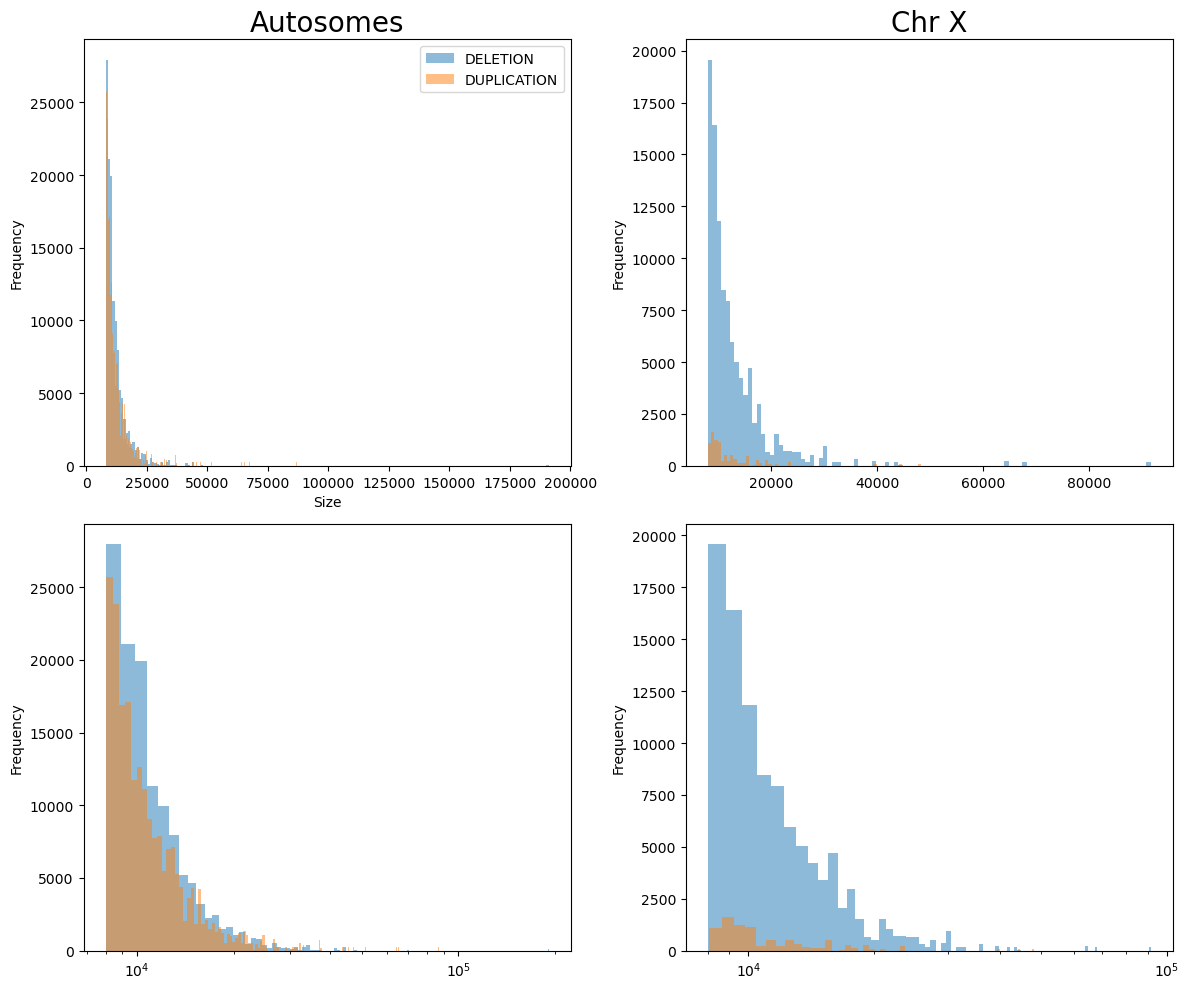

In [10]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(12, 10, forward=True)

axs[0, 0].set_title('Autosomes', size=20)

df1 = data_no_sex_chr.groupby(['TYPE'])['LENGHT']

df1.plot(kind='hist',stacked=True, bins=200, legend=True, ax=axs[0,0], xlabel='Size', alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


df2 = data_no_sex_chr.groupby(['TYPE'])['LENGHT']

df2.plot(kind='hist',stacked=True, bins=200, logx=True, ax=axs[1,0], alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


#fig.suptitle
axs[0, 1].set_title('Chr X', size=20)

df3 = data_x.groupby(['TYPE'])['LENGHT']

df3.plot(kind='hist',stacked=True, bins=100, ax=axs[0,1], alpha=0.5) # alpha for transparency

#plt.show()

df4 = data_x.groupby(['TYPE'])['LENGHT']

df4.plot(kind='hist',stacked=True, bins=100,logx=True, ax=axs[1,1], alpha=0.5) # alpha for transparency


fig.tight_layout() 
#plt.savefig('../plots/distribution_chm13.png', transparent=True)
plt.show()

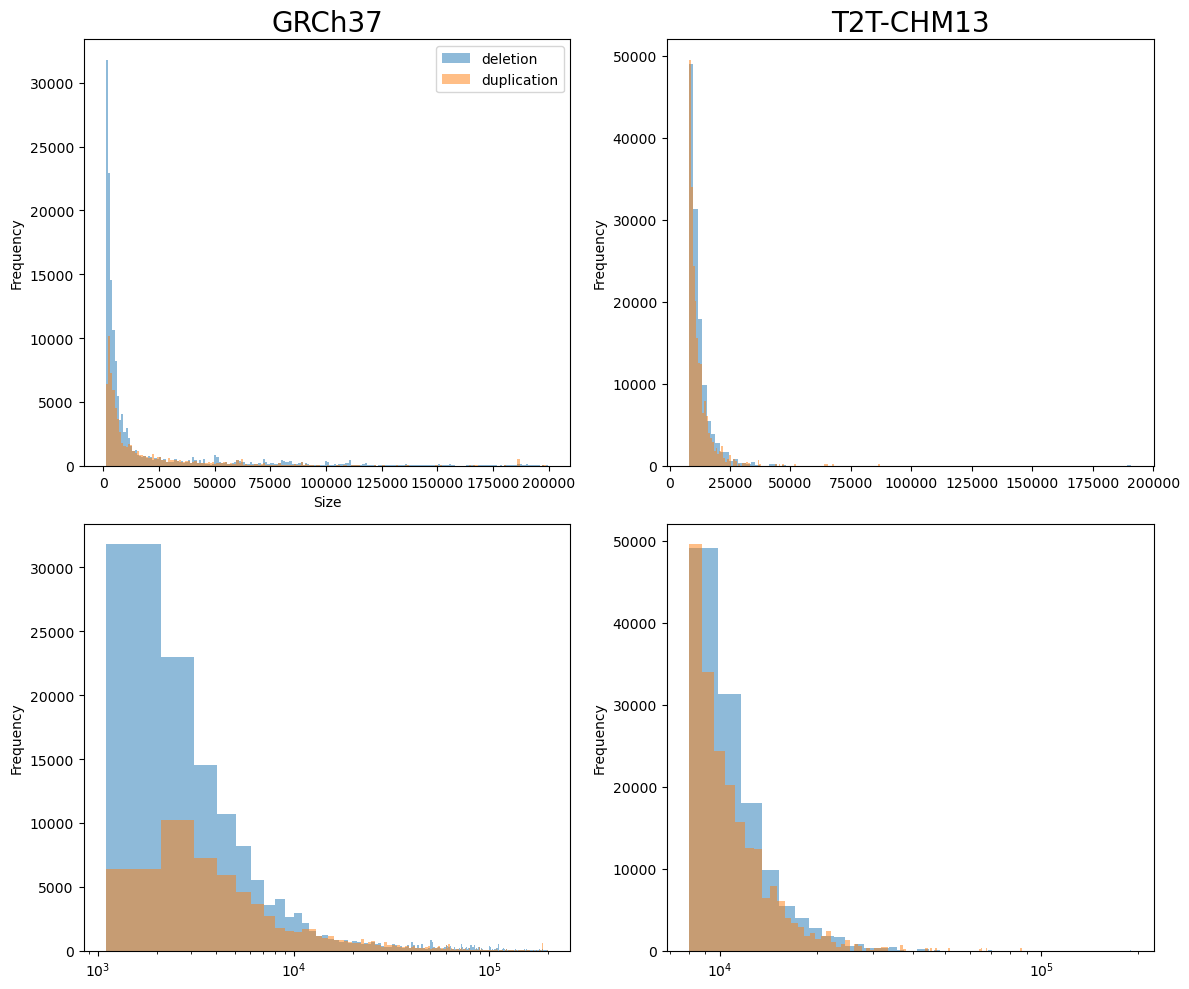

In [23]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(12, 10, forward=True)

axs[0, 0].set_title('GRCh37', size=20)

df = data_no_sex_chr.groupby(['SCORE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=200, legend=True, ax=axs[0,0], xlabel='Size', alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


df = data_no_sex_chr.groupby(['SCORE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=200, logx=True, ax=axs[1,0], alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


#fig.suptitle
axs[0, 1].set_title('T2T-CHM13', size=20)

df = data_no_sex_chr_chm13.groupby(['TYPE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=100, ax=axs[0,1], alpha=0.5) # alpha for transparency

#plt.show()

df = data_no_sex_chr_chm13.groupby(['TYPE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=100,logx=True, ax=axs[1,1], alpha=0.5) # alpha for transparency


fig.tight_layout() 
plt.savefig('../plots/distribution_t2t_and_grch37.png', transparent=True)
plt.show()

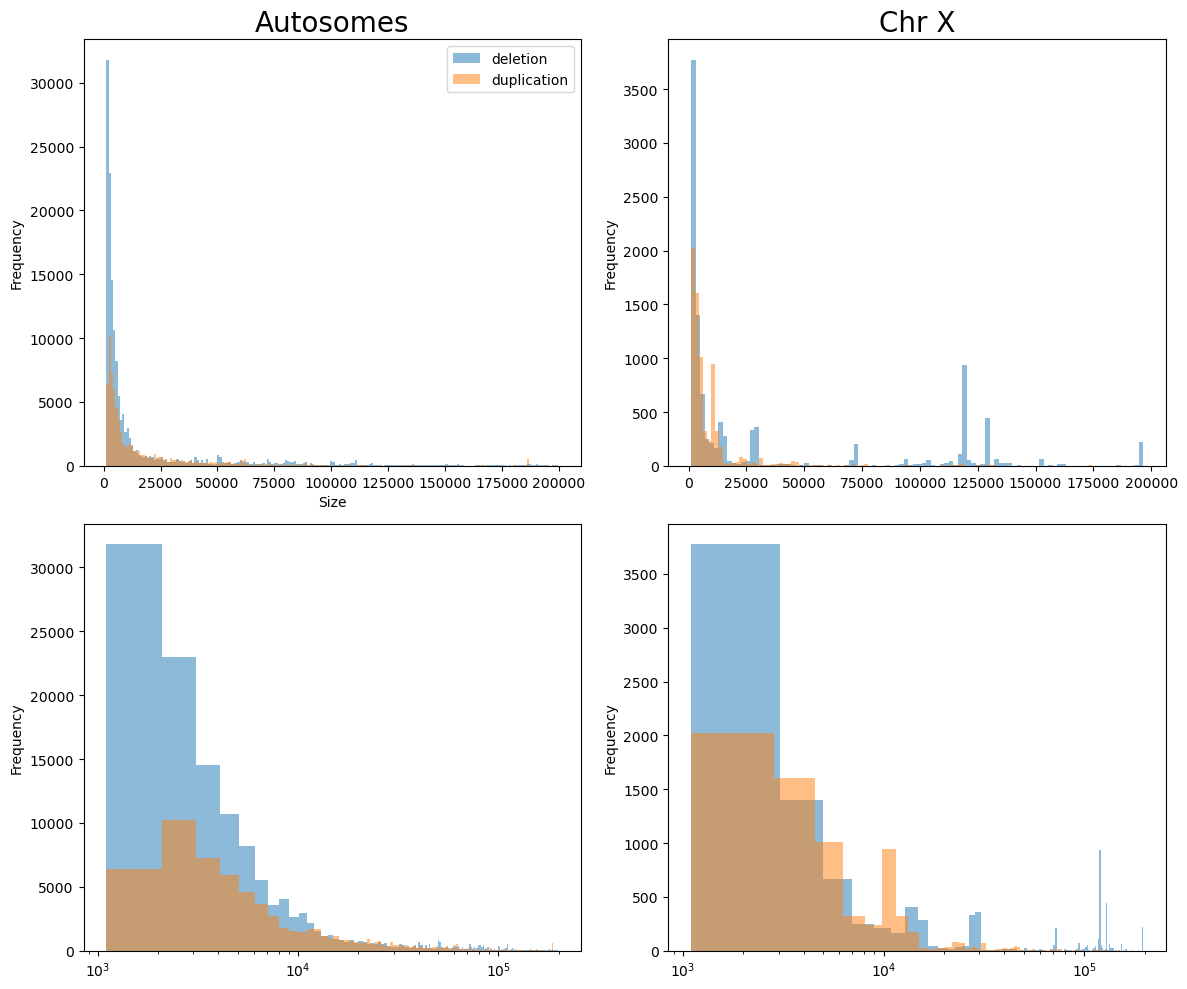

In [4]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(12, 10, forward=True)

axs[0, 0].set_title('Autosomes', size=20)

df = data_no_sex_chr.groupby(['SCORE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=200, legend=True, ax=axs[0,0], xlabel='Size', alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


df = data_no_sex_chr.groupby(['SCORE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=200, logx=True, ax=axs[1,0], alpha=0.5) # alpha for transparency
#plt.xlabel('Size')


#fig.suptitle
axs[0, 1].set_title('Chr X', size=20)

df = data_x.groupby(['SCORE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=100, ax=axs[0,1], alpha=0.5) # alpha for transparency

#plt.show()

df = data_x.groupby(['SCORE'])['LENGHT']

df.plot(kind='hist',stacked=True, bins=100,logx=True, ax=axs[1,1], alpha=0.5) # alpha for transparency


fig.tight_layout() 
#plt.savefig('../plots/distribution.png', transparent=True)
plt.show()

In [21]:
data_no_sex_chr

,Sample_ID,Chr,Start_original,End_original,Start,End,SIZE,SCORE,RD,LENGHT,P-VALUE,GAUSSIAN
0,LP6005441-DNA_A01,1,231001,237900,228416,267160,3.0,duplication,2.089230,6900.0,0.000000e+00,5.215800e-35
1,LP6005441-DNA_A01,1,471201,551200,471226,471326,1.0,deletion,0.187758,80000.0,1.992160e-12,2.215930e+09
2,LP6005441-DNA_A01,1,723801,728100,712534,763301,3.0,duplication,1.594500,4300.0,1.120070e-02,1.742820e+09
3,LP6005441-DNA_A01,1,1010901,1014200,1009660,1015541,1.0,deletion,0.498249,3300.0,5.434590e-04,2.196950e+09
4,LP6005441-DNA_A01,1,4124201,4127700,4120597,4131559,1.0,deletion,0.505571,3500.0,4.553500e-11,2.217790e-35
...,...,...,...,...,...,...,...,...,...,...,...,...
256000,SS6004480,22,21875601,21887000,21810729,21918976,1.0,deletion,0.612325,11400.0,1.398000e-11,1.464730e+09
256001,SS6004480,22,21899501,21905700,21810729,21918976,1.0,deletion,0.562137,6200.0,2.570520e-11,5.057780e+03
256002,SS6004480,22,21909101,21915000,21810729,21918976,3.0,duplication,1.358500,5900.0,1.458660e-09,6.838820e-01
256003,SS6004480,22,31987601,31989000,31985671,31997719,1.0,deletion,0.214689,1400.0,4.936490e-02,2.281010e-01
